<a href="https://colab.research.google.com/github/ogwora/Core_IP8/blob/master/Moringa_Core_2021_09_IP_W8_Lawrence_Ondieki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview 

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. We will use the healthcare datasets provided to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

## 1.0 Part 1: Decision trees:
- Build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
- Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
- Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
- Note that with decision trees, you don't need to do a lot of data cleaning. This will be very different with SVM.

## 2.0 Part 2: SVM:

- Clean the data and document any transformations done on the data.

- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.

-  After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version. 


### Dataset Columns

- Age
- Sex
- on_thyroxine
- query_on_thyroxine
- on_antithyroid_medicationthyroid_surgery
- query_hypothyroid
- query_hyperthyroid
- pregnant
- sick
- tumor
- lithium
- goitre
- TSH_measured
- TSH
- T3_measured
- T3
- TT4_measured
- TT4

## Import the Libraries required

In [159]:
# Import libraries
import numpy as np
import pandas as pd
from six import StringIO

# Scikit Learn libraries
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

# The Metrics
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# The visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz 
from IPython.display import Image  
import pydotplus

# Filter Python "Future" warnings
import warnings
warnings.filterwarnings('ignore')


## Load the data

In [69]:
# load the data
hypo = pd.read_csv('hypothyroid.csv', encoding='utf-8')

In [70]:
# Top 5 entries in the dataset
hypo.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [71]:
#Basic information on the dataset
hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [72]:
# Change all column names to lower case
hypo.columns=hypo.columns.str.lower()
hypo.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

In [73]:
# Check for duplicates
hypo[hypo.duplicated()]

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
53,hypothyroid,69,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,0.80,y,53,y,0.86,y,61,n,?
66,hypothyroid,62,M,f,f,f,f,f,f,f,f,f,f,f,y,100,y,0.40,y,10,y,1,y,10,n,?
124,hypothyroid,77,F,f,f,f,f,f,f,f,f,f,f,f,y,23,y,0.50,y,33,y,0.67,y,49,n,?
128,hypothyroid,79,F,f,f,f,f,f,f,f,f,f,f,f,y,29,y,1.60,y,47,y,0.97,y,48,n,?
131,hypothyroid,50,F,t,f,f,f,f,f,f,f,f,f,f,y,34,n,?,y,55,y,0.93,y,60,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,negative,28,M,f,f,f,f,f,f,f,f,f,f,f,y,1,y,3.10,y,107,y,1.05,y,103,n,?
3055,negative,33,F,f,f,f,f,f,f,f,f,f,f,f,n,?,y,0.80,y,88,y,1.02,y,86,n,?
3066,negative,74,F,t,f,f,f,f,f,f,f,f,f,f,y,21,y,1.80,y,126,y,1.18,y,107,n,?
3111,negative,89,M,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.90,y,82,y,0.80,y,103,n,?


There are 77 rows duplicated

In [74]:
# Remove duplicates
hypo.drop_duplicates(keep='first', inplace=True)
hypo[hypo.duplicated()]

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg


Duplicates have been removed.

### Check for uniformity, consistency and accuracy

In [75]:
# Checking for the number of unique values in each column
# This will help know the number of categories in categorical data
# and to check for consistency, uniformity and accuracy

# Print unique values for each column
for column in hypo.columns:
  print("Column: ",column)
  print("Number of Unique observations: ",hypo[column].nunique())
  print("Unique Observations:\n",hypo[column].unique())
  print('_________________________________________________________________________\n')

Column:  status
Number of Unique observations:  2
Unique Observations:
 ['hypothyroid' 'negative']
_________________________________________________________________________

Column:  age
Number of Unique observations:  93
Unique Observations:
 ['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
_________________________________________________________________________

Column:  sex
Number of Unique observations:  3
Unique Observations:
 ['M' 'F' '?']
_________________________________________________________________________

Column:  on_thyroxine
Number of Unique observations:  2
Un

### It is observed that some columns have a '?' recorded in place of a null value.
This '?' does not show up as a null value.

In [76]:
# Test for any actual recorded null values.
hypo.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
tsh_measured                 0
tsh                          0
t3_measured                  0
t3                           0
tt4_measured                 0
tt4                          0
t4u_measured                 0
t4u                          0
fti_measured                 0
fti                          0
tbg_measured                 0
tbg                          0
dtype: int64

## I will replace '?' with np.nan

In [77]:
# Replace '?' with np.nan and count the null values.
hypo_df = hypo.replace(['?'], np.nan)
hypo_df.isnull().sum()

status                          0
age                           438
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
tsh_measured                    0
tsh                           455
t3_measured                     0
t3                            680
tt4_measured                    0
tt4                           240
t4u_measured                    0
t4u                           239
fti_measured                    0
fti                           238
tbg_measured                    0
tbg                          2835
dtype: int64

In [78]:
hypo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3086 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3086 non-null   object
 1   age                        2648 non-null   object
 2   sex                        3013 non-null   object
 3   on_thyroxine               3086 non-null   object
 4   query_on_thyroxine         3086 non-null   object
 5   on_antithyroid_medication  3086 non-null   object
 6   thyroid_surgery            3086 non-null   object
 7   query_hypothyroid          3086 non-null   object
 8   query_hyperthyroid         3086 non-null   object
 9   pregnant                   3086 non-null   object
 10  sick                       3086 non-null   object
 11  tumor                      3086 non-null   object
 12  lithium                    3086 non-null   object
 13  goitre                     3086 non-null   object
 14  tsh_meas

### The dataset shows all columns are of the same 'object' type.

#### We change all columns to the correct data type.

In [79]:
# Changing column datatypes to their appriopriate datatypes
# Lists of numerical, categorical and bool columns have been created for efficiency
# Numerical columns list
#
for column in ['age', 'tsh', 't3', 'tt4', 't4u', 'fti']:
  hypo_df[column] = hypo_df[column].astype('float')

# Categorical columns list
for column in ['status', 'sex','tsh_measured', 't3_measured', 'tt4_measured',
              't4u_measured', 'fti_measured']:
  hypo_df[column] = hypo_df[column].astype('category')

# Boolean columns list
for column in ['on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication',
              'thyroid_surgery', 'query_hypothyroid','query_hyperthyroid', 
              'pregnant', 'sick', 'tumor', 'lithium', 'goitre']:
  hypo_df[column] = hypo_df[column].replace('f', False)
  hypo_df[column] = hypo_df[column].replace('t', True)
  hypo_df[column] = hypo_df[column].astype('bool')

# Previewing the column datatypes to check whether the changes have been effected
#
hypo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3086 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   status                     3086 non-null   category
 1   age                        2648 non-null   float64 
 2   sex                        3013 non-null   category
 3   on_thyroxine               3086 non-null   bool    
 4   query_on_thyroxine         3086 non-null   bool    
 5   on_antithyroid_medication  3086 non-null   bool    
 6   thyroid_surgery            3086 non-null   bool    
 7   query_hypothyroid          3086 non-null   bool    
 8   query_hyperthyroid         3086 non-null   bool    
 9   pregnant                   3086 non-null   bool    
 10  sick                       3086 non-null   bool    
 11  tumor                      3086 non-null   bool    
 12  lithium                    3086 non-null   bool    
 13  goitre                     3086 n

### Check again for any missing values and visualize.

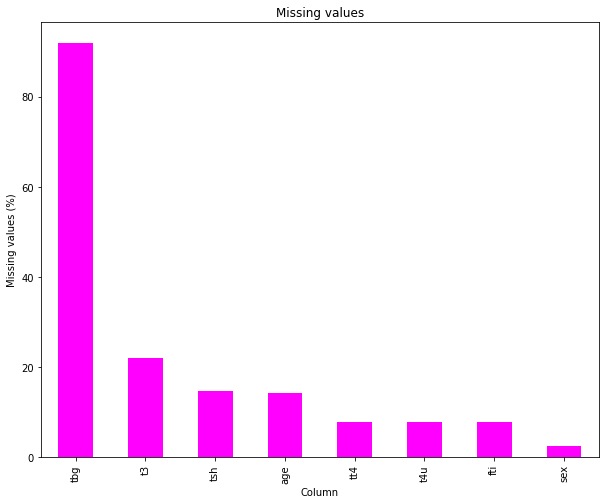

In [80]:
# Visualising missing values
#
(hypo_df.isna().mean().round(4)*100).sort_values(ascending = False)[:8].plot(kind = 'bar', figsize = (10, 8), color = 'magenta')
plt.title('Missing values')
plt.ylabel('Missing values (%)')
plt.xlabel('Column')
plt.show()

#### tbg has 2835 null values (>90%). This column can be dropped.

In [81]:
# Dropping the tbg and tbg_measured columns
#
hypo_df.drop(['tbg', 'tbg_measured'], axis = 1, inplace = True)

### Filling missing values

In [82]:
# Fill in missing values in 'sex' with mode.
hypo_df.sex.fillna(hypo_df.sex.mode()[0], inplace = True)

In [83]:
# Filling missing values in numerical columns with mean
#
for column in ['age', 'tsh', 't3', 'tt4', 't4u', 'fti']:
  hypo_df[column].fillna(hypo_df[column].mean(), inplace = True)

In [84]:
# Our data is clean now.
hypo_df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti
0,hypothyroid,72.0,M,False,False,False,False,False,False,False,False,False,False,False,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0
1,hypothyroid,15.0,F,True,False,False,False,False,False,False,False,False,False,False,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0
2,hypothyroid,24.0,M,False,False,False,False,False,False,False,False,False,False,False,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0
3,hypothyroid,24.0,F,False,False,False,False,False,False,False,False,False,False,False,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0
4,hypothyroid,77.0,M,False,False,False,False,False,False,False,False,False,False,False,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0


In [85]:
# Write the clean data to a file for later use.
hypo_df.to_csv('hypothyroid_clean.csv')

## Check for outliers using boxplots

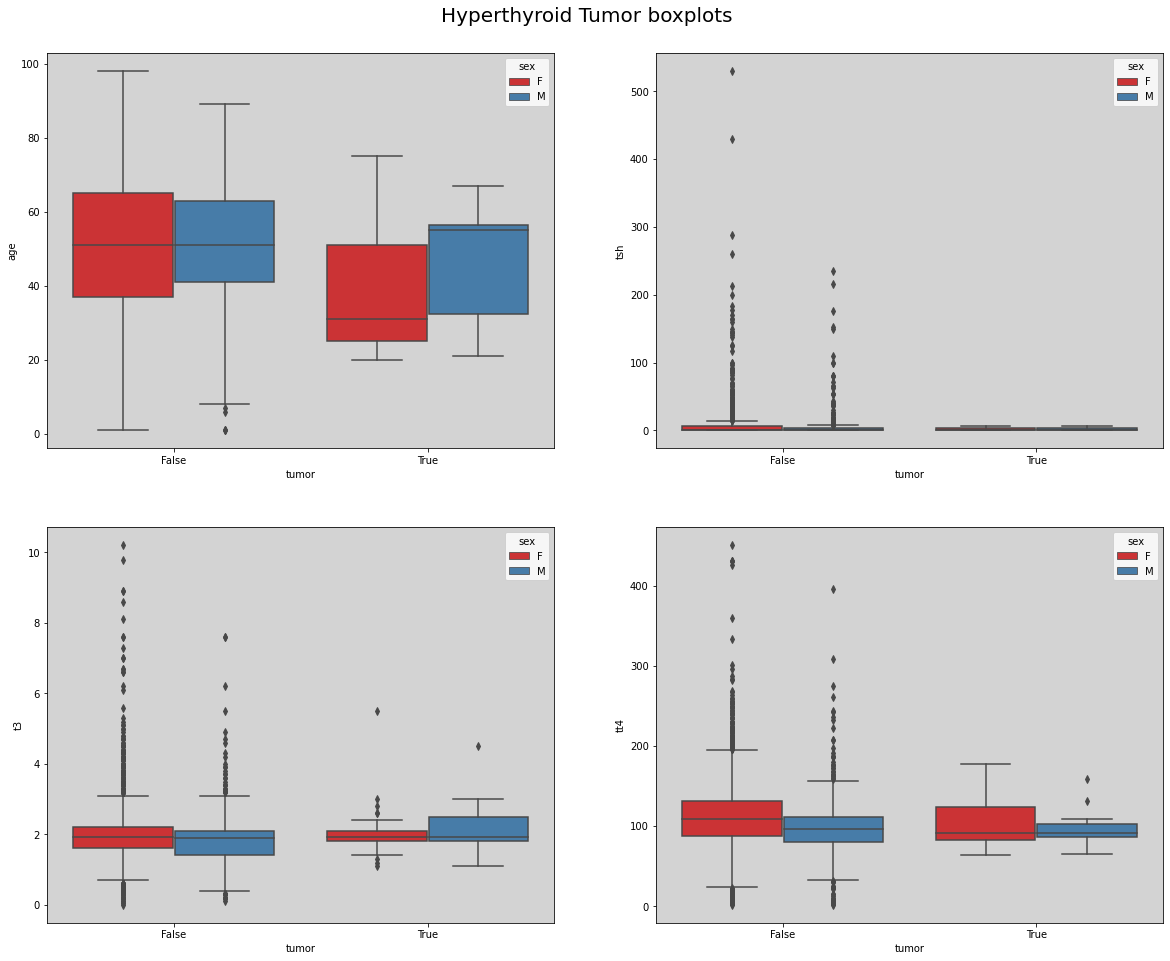

In [93]:
# Use boxplots to visualize outliers
#
fig, axes = plt.subplots(2, 2, figsize = (20, 16))
plt.suptitle('Hyperthyroid Tumor boxplots', fontsize = 20, y = 0.92)
for ax, data, column in zip(axes.flatten(), hypo_df, ['age', 'tsh', 't3', 'tt4', 't4u', 'fti']):
  sns.boxplot(hypo_df.tumor, hypo_df[column], ax = ax, hue = hypo_df.sex, palette = 'Set1')
  ax.set_facecolor('lightgrey') 

- There are no outliers in 'age' data.

- There are more outliers in the t3, tt4 and tsh columns when the tumor is *negative*

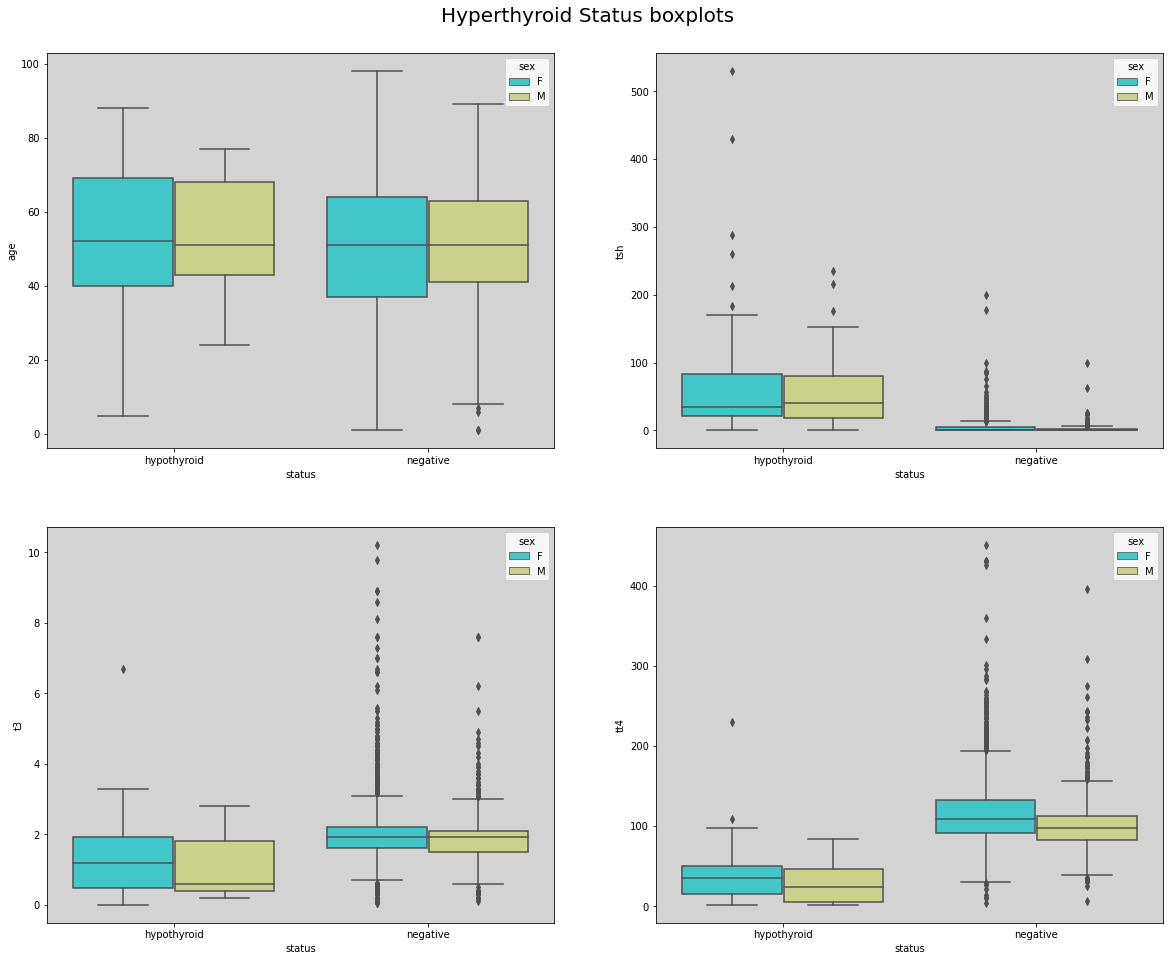

In [94]:
# Plotting boxplots for hyperthyroid outliers
#
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 16))
plt.suptitle('Hyperthyroid Status boxplots', fontsize = 20, y = 0.92)
for ax, data, column in zip(axes.flatten(), hypo_df, ['age', 'tsh', 't3', 'tt4', 't4u', 'fti']):
  sns.boxplot(hypo_df.status, hypo_df[column], ax = ax, hue = hypo_df.sex, palette = 'rainbow')
  ax.set_facecolor('lightgrey')


- The distribution of age is similar whether a person has hypothyroid or not
- The tsh column has the most outliers when compared with t3 and tt4, when hypothyroid diagnosis is positive.
- Across the t3, tt4 and tsh columns, outliers are more pronounced when diagnosis for hypothyroid is negative.

### Bar Charts

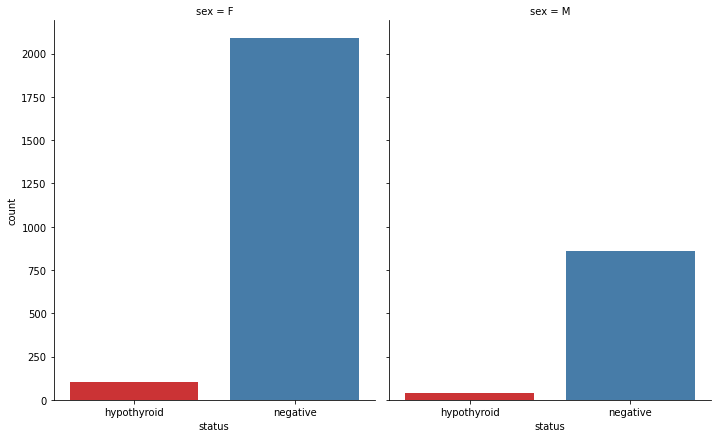

In [95]:

# Plotting bar charts
#
sns.catplot("status", col="sex", col_wrap=4, data=hypo_df, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

## Heat Map

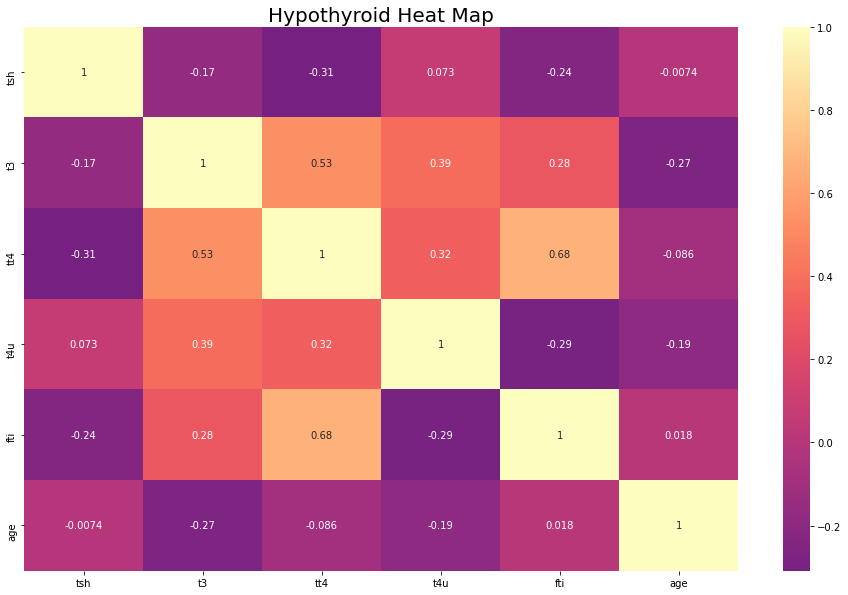

In [97]:

# Plotting a heatmap to show correlations between variables
#
corr = hypo_df[['tsh', 't3', 'tt4', 't4u', 'fti', 'age']].corr()
plt.figure(figsize = (16, 10))
sns.heatmap(corr, cmap='magma', annot = True, center = 0)
plt.title('Hypothyroid Heat Map', fontsize = 20)
plt.show()

- There is a strong positive relationship between fti and tt4 - 0.68
- tt4 and t3 have a postive relationship with a correlation coefficient of 0.53

## Pair Plots to compare with heatmap for correlations

<Figure size 1280x800 with 0 Axes>

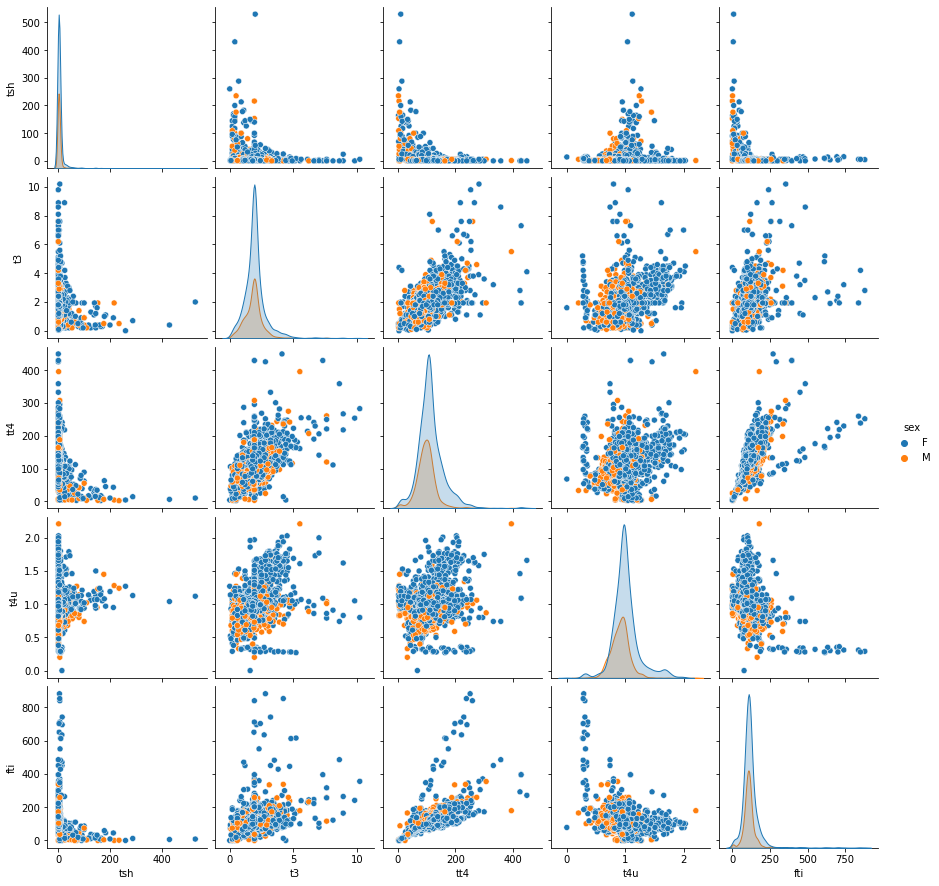

In [104]:
# Pair plots
plt.figure(dpi= 80,figsize=(16,10))
sns.pairplot(hypo_df[['tsh', 't3', 'tt4', 't4u', 'fti', 'sex']], kind="scatter", hue="sex")
plt.show()

This confirms what was observed with the heatmap
- there is positive relationship between fti and tt4 - 0.68
- tt4 and t3 have a postive relationship with a correlation coefficient of 0.53

# Data Modelling

## Decision Trees
- Random forests.
- Ada boosted trees.
- Gradient boosted trees.

### RandomForestClassifier

In [110]:
# Selecting the X(independent) variables and the y (target) variable
#
X = hypo_df.drop('status', axis = 1)
y = np.where(hypo_df.status == 'hypothyroid', 1, 0)

# Encoding categorical variables
#
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
rf = RandomForestClassifier(random_state = 0)
# Train the model
#
rf.fit(X_train, y_train)

# Making predictions
#
y_pred = rf.predict(X_test)

# Measuring the accuracy of the model
#
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}\n')
print(f'f1 score: \t {f1_score(y_test, y_pred)}')
print('\n')
print(f'Classification Report:\n {classification_report(y_test, y_pred)}')
print(f'Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}')

Accuracy score: 0.990280777537797

f1 score: 	 0.8799999999999999


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       887
           1       0.92      0.85      0.88        39

    accuracy                           0.99       926
   macro avg       0.95      0.92      0.94       926
weighted avg       0.99      0.99      0.99       926

Confusion Matrix: 
 [[884   3]
 [  6  33]]


#### Feature importance

In [111]:
# Checking for the most important features that contribute most in predicting the target
# Create a dataframe of features and their respective importances
#
importance_df = pd.DataFrame({'feature': X.columns, 'importance': np.round(rf.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
importance_df

,importance
feature,
fti,0.3039
tsh,0.2379
tt4,0.2246
t3,0.0786
t4u,0.0479
age,0.0427
query_hypothyroid,0.0100
on_antithyroid_medication,0.0097
tsh_measured_n,0.0060


### Visualize

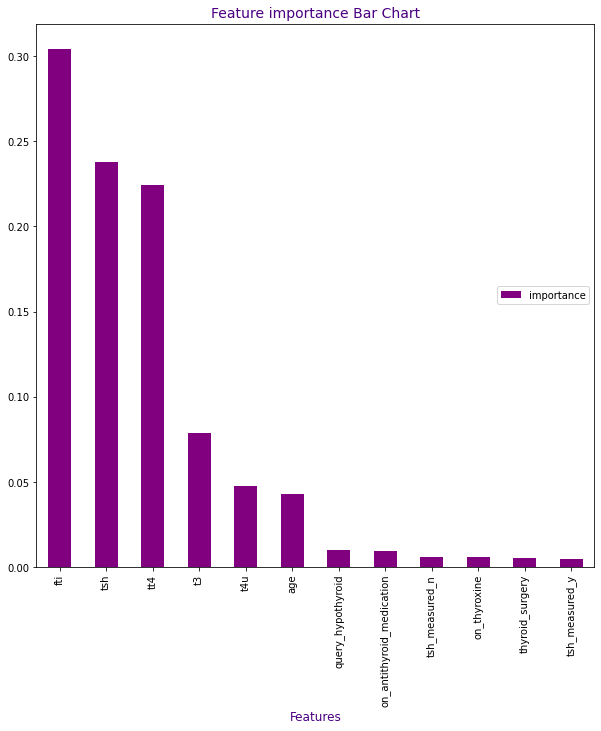

In [116]:
# Creating a bar chart of feature importance in descending order
#
importance_df = importance_df[:12].sort_values(by = 'importance', ascending = False)
importance_df.plot(kind = 'bar', figsize = (10, 10), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Feature importance Bar Chart', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()


**The top 3 most important features in predicting whether a paerson has hypothyroid are fti, tsh and tt4 in that order.**

### **Remodelling with important features only**

In [119]:
# Selecting only important features and the y variable
#
X = X[['age', 'on_thyroxine', 'sex_F', 'sex_M', 'tsh_measured_y',
        'thyroid_surgery', 'sick', 'tsh', 't3', 'tt4', 't4u', 'fti', 'tsh_measured_n']]

y = np.where(hypo_df.status == 'hypothyroid', 1, 0)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)

# Making predictions
#
y_pred = rf.predict(X_test)

# Measuring the accuracy of the model
#
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}\n')
print(f'f1 score: \t {f1_score(y_test, y_pred)}')
print('\n')
print(f'Classification Report:\n {classification_report(y_test, y_pred)}')
print(f'Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}')

Accuracy score: 0.9935205183585313

f1 score: 	 0.9210526315789475


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       887
           1       0.95      0.90      0.92        39

    accuracy                           0.99       926
   macro avg       0.97      0.95      0.96       926
weighted avg       0.99      0.99      0.99       926

Confusion Matrix: 
 [[885   2]
 [  4  35]]


*There is some increase in f1 score from 0.8799999999999999 to 0.9210526315789475*

### What parameters available to tune in RandomForestClassifier()

In [120]:
# Parameter tuning
#
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

We will use 10 splits( kfold), shuffle and different combinations of estimators and depths

In [126]:
# Parameter tuning
#
model = RandomForestClassifier()
params = {'n_estimators': [10, 20, 30, 50, 100],
         'max_depth': [1, 2, 3, 4, 5]}

# Use 10 splits
kfold = KFold(n_splits=10, shuffle=True)

# Use Grid Search cross validation
gsearch = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

# Fitting the grid search with the X and the y variables
#
gsearch.fit(X, y)

# Checking for the best parameters
#
print(f'The best parameters are: {gsearch.best_params_}')

The best parameters are: {'max_depth': 5, 'n_estimators': 10}


#### The best parameters are for 10 splits is max_depth: 5 across the n_estimators: 10,20,30.

### Visualizing the tree - example 5th tree

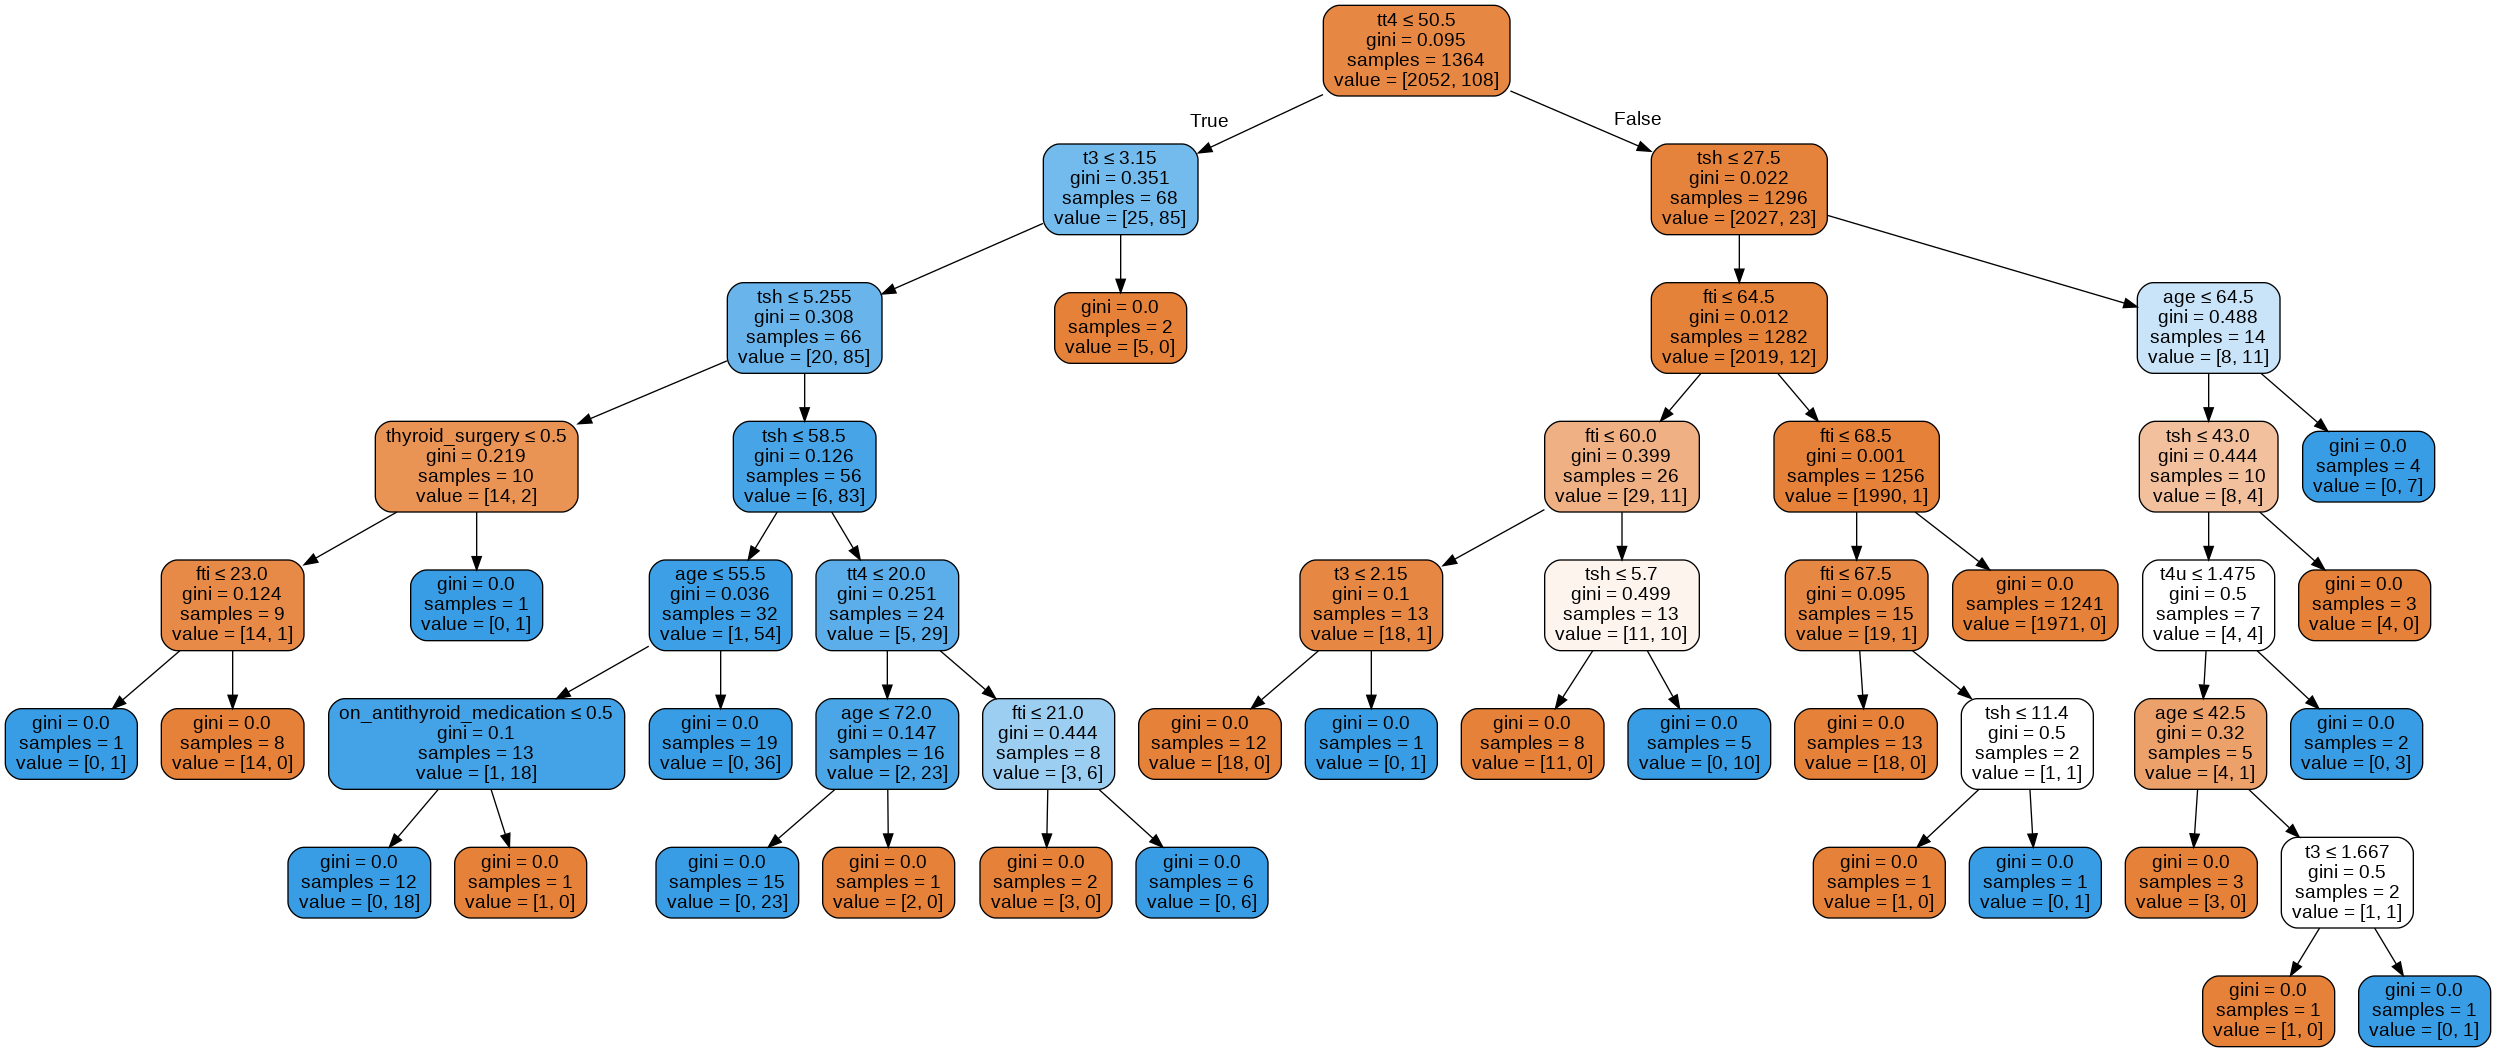

In [141]:
# picking the 5th tree from the forest
tree = rf.estimators_[5]

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Checking stability of model with Cross Validation

In [144]:
# Performing cross validation of ten folds
#
scores = cross_val_score(rf, X, y, scoring = 'f1', cv = 10)

# Calculating the mean of the cross validation scores
#
print(f'Cross validation scores mean: {scores.mean()}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Cross validation scores standard deviation: {scores.std()}')


Cross validation scores mean: 0.8793839417287692
Cross validation scores standard deviation: 0.06752852727509381


## AdaBoostClassifier()

In [149]:
# Selecting only important features and the y variable
#
X = X[['fti', 'age', 'tsh', 't4u', 't3', 'tt4', 'on_antithyroid_medication', 'query_hypothyroid', 'thyroid_surgery', 'on_thyroxine']]

y = np.where(hypo_df.status == 'hypothyroid', 1, 0)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
ada = AdaBoostClassifier(learning_rate=1, n_estimators=30, random_state = 0)
ada.fit(X_train, y_train)

# Making predictions
#
y_pred = ada.predict(X_test)

# Measuring the accuracy of the model
#
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}\n')
print(f'f1 score: \t {f1_score(y_test, y_pred)}')
print('\n')
print(f'Classification Report:\n {classification_report(y_test, y_pred)}')
print(f'Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}')

Accuracy score: 0.9924406047516199

f1 score: 	 0.9090909090909091


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       887
           1       0.92      0.90      0.91        39

    accuracy                           0.99       926
   macro avg       0.96      0.95      0.95       926
weighted avg       0.99      0.99      0.99       926

Confusion Matrix: 
 [[884   3]
 [  4  35]]


## AdaBoostClassifier Parameter Tuning

In [150]:
# Available AdaBoostparameters
#
AdaBoostClassifier()

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [151]:
# Apply same logic as RandomForestClassifier
#
params = {'n_estimators': [10, 20, 30, 50, 100],
         'learning_rate': [1, 2, 3, 4, 5]}

# Setting the number of folds to 10 and instantiating the model
# 
kfold = KFold(n_splits=10, shuffle=True)
model = AdaBoostClassifier()

search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

# Fitting the grid search with the X and the y variables
#
search.fit(X, y)

# Checking for the best parameters
#
print(f'The best parameters: {search.best_params_}')

The best parameters: {'learning_rate': 1, 'n_estimators': 30}


In [152]:
# Selecting only important features and the y variable
#
X = X[['fti', 'age', 'tsh', 't4u', 't3', 'tt4', 'on_antithyroid_medication', 'query_hypothyroid', 'thyroid_surgery', 'on_thyroxine']]

y = np.where(hypo_df.status == 'hypothyroid', 1, 0)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
ada = AdaBoostClassifier(learning_rate=1, n_estimators=30, random_state = 0)
ada.fit(X_train, y_train)

# Making predictions
#
y_pred = ada.predict(X_test)

y_pred = ada.predict(X_test)

# Measuring the accuracy of the model
#
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}\n')
print(f'f1 score: \t {f1_score(y_test, y_pred)}')
print('\n')
print(f'Classification Report:\n {classification_report(y_test, y_pred)}')
print(f'Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}')

Accuracy score: 0.9924406047516199

f1 score: 	 0.9090909090909091


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       887
           1       0.92      0.90      0.91        39

    accuracy                           0.99       926
   macro avg       0.96      0.95      0.95       926
weighted avg       0.99      0.99      0.99       926

Confusion Matrix: 
 [[884   3]
 [  4  35]]


### Visualizing the 10th tree stump

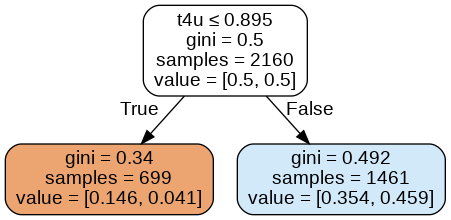

In [153]:
dot_data = StringIO()
# pick a specific tree from the forest
tree = ada.estimators_[10]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Cross Validating the AdaBoostClassifier model stability

In [154]:
# Performing cross validation of ten folds
#
scores = cross_val_score(ada, X, y, scoring = 'f1', cv = 10)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {scores.mean()}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {scores.std()}')

Mean of cross validation scores is 0.871661347592382
Standard deviation of the cross validation scores is 0.09766432601055766


### AdaBoostClassifier has a higher f1 score of 87% while RandomForest has a general f1 score of 83%.
AdaBoostClassifier is a better predicter than RandomForestClassifier

## Support Vector Classifier (SVC)

We will use top two features in comparing svc kernels to find one with a maximum f1 score

In [160]:
# Selecting the independent variables and the target variable
#
X = hypo_df[['fti', 'tsh']].values
y = np.where(hypo_df.status == 'hypothyroid', 1, 0)

# Instantiating and creating a list of models for iteration
#
poly = SVC(kernel='poly')
linear = SVC(kernel = 'linear')
rbf = SVC(kernel ='rbf')

# Creating a list of the models and model names
#
models = [poly, linear, rbf]
model_names = ['Polynomial', 'Linear', 'Rbf']
# Creating a function that trains a model and returns its accuracy together with the model
#
def predictor(model, X, y):
  # Splitting the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
  
  # Standardising the data
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  
  # Training the model and making predictions
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  # Measuring the accuracy of the model
  f1 = f1_score(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)
  
  # Returning the accuracy and the model
  return acc, f1, model

  # Getting the accuracies of the models  using a for loop
#
for model, name in zip(models, model_names):
  print(f'The accuracy score of {name:<10} is: {predictor(model, X, y)[0]} and the f1 score is: {predictor(model, X, y)[1]}')

The accuracy score of Polynomial is: 0.9838012958963283 and the f1 score is: 0.7692307692307693
The accuracy score of Linear     is: 0.9859611231101512 and the f1 score is: 0.8169014084507042
The accuracy score of Rbf        is: 0.9848812095032398 and the f1 score is: 0.7941176470588235


### SVC Model Visualization

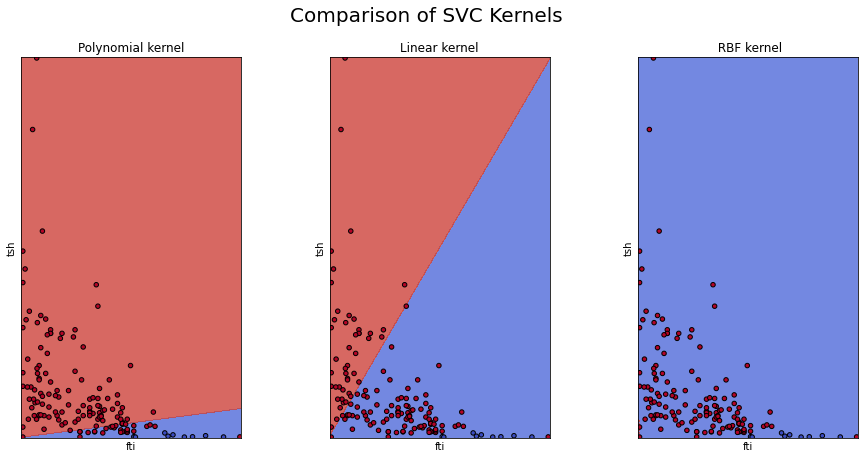

In [162]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Set-up 1x3 grid for plotting.
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 7))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.suptitle('Comparison of SVC Kernels', fontsize = 20)

# title for the plots
titles = ('Polynomial kernel', 'Linear kernel', ' RBF kernel')

# Randomly selecting 300 datapoints to plot
X = hypo_df[['fti', 'tsh']].iloc[:150, :].values
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, axes.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y[:150], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('fti')
    ax.set_ylabel('tsh')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

## SVC Hyperparameter tuning


In [163]:
# Previewing parameters of the SVC model that can be tuned
#
SVC()

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [164]:
params = {'C': np.arange(1, 102, 10),
         'gamma': np.linspace(2**-5, 2**5, 10)}

# Setting the number of folds to 10 and instantiating the model
# 
kfold = KFold(n_splits=3, shuffle=True)
model = SVC(kernel = 'linear')

search = RandomizedSearchCV(model, param_distributions=params, scoring = 'f1', cv = kfold, random_state = 0)

# Selecting the independent variables and the target variable
#
X = hypo_df[['fti', 'tsh']]
y = np.where(hypo_df.status == 'hypothyroid', 1, 0)

# Fitting the grid search with the X and the y variables
#
gsearch.fit(X, y)

# Checking for the best parameters
#
print(f'The best parameters are: {gsearch.best_params_}')

The best parameters are: {'max_depth': 5, 'n_estimators': 100}


## Remodelling with optimal parameters

In [165]:
# Selecting only important features and the y variable
#
X = hypo_df.drop('status', axis = 1)

y = np.where(hypo_df.status == 'hypothyroid', 1, 0)

# Encoding categorical variables
#
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Standardising features
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Instantiating the model with optimal features
#
svc = SVC(C = 21, gamma = 0.03125, kernel='linear')
svc.fit(X_train, y_train)

# Making predictions
#
y_pred = svc.predict(X_test)

# Measuring the accuracy of the model
#
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}\n')
print(f'f1 score: \t {f1_score(y_test, y_pred)}')
print('\n')
print(f'Classification Report:\n {classification_report(y_test, y_pred)}')
print(f'Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}')


Accuracy score: 0.9881209503239741

f1 score: 	 0.8493150684931507


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       887
           1       0.91      0.79      0.85        39

    accuracy                           0.99       926
   macro avg       0.95      0.90      0.92       926
weighted avg       0.99      0.99      0.99       926

Confusion Matrix: 
 [[884   3]
 [  8  31]]


## Check stability of the model using cross-validation


In [166]:
# test with 10-folds
#
scores = cross_val_score(svc, X, y, scoring = 'f1', cv = 10)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {scores.mean()}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {scores.std()}')

Mean of cross validation scores is 0.8133239546283024
Standard deviation of the cross validation scores is 0.07691071483570998


### It still shows AdaBoost performs better than SVC


# Conclusion
1. The AdaBoostClassifier performs well with an f1 score of approximately 86%
2. for SVC, the best performing kernel in the is Linear with an accuracy score 98.5% of and an f1 score of 84.9%